#  Clusterização Método do Cotovelo

O dataset que temos é sobre estudantes de diferentes cursos universitários, como agronomia, design, educação, enfermagem, jornalismo, administração, serviço social e tecnologias. Ele inclui informações sobre a matrícula dos alunos, como histórico acadêmico, dados demográficos e fatores socioeconômicos.

Dataset utilizado está disponível em: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [2]:
import pandas as pd

Para começarmos, realizamos a leitura dos dados em csv e tiraremos a classe dele. Nesse caso, a classe é 'Target'.

In [5]:
df = pd.read_csv('data.csv', delimiter=';')

In [6]:
df_sem_classe = df.drop('Target', axis=1)

In [7]:
df_sem_classe.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


Identificamos os atributos nominais e deixamos eles em binário com o uso do pd.get_dumies(). Normalizamos os dados também.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Identificar atributos nominais e transformar em binários
df_sem_classe = pd.get_dummies(df_sem_classe)

# Normalizar atributos contínuos usando MinMaxScaler
scaler = MinMaxScaler()
df_sem_classe_normalized = pd.DataFrame(scaler.fit_transform(df_sem_classe), columns=df_sem_classe.columns)

# Exibir as primeiras linhas do DataFrame normalizado
df_sem_classe_normalized.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.0,0.418605,0.255814,...,0.0,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
1,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.0,0.000000,0.046512,...,0.0,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687
2,0.0,0.000000,0.555556,0.907512,1.0,0.0,0.284211,0.0,0.837209,0.837209,...,0.0,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
3,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.0,0.860465,0.837209,...,0.0,0.0,0.26087,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174
4,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.0,0.837209,0.860465,...,0.0,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687


Aqui definimos o numero de grupos baseando-se no número de classes. Com isso, aplicamos o algoritmo K-means

In [11]:
from sklearn.cluster import KMeans

# Definir o número de grupos como o número de classes
num_grupos = len(df['Target'].unique())

# Inicializar e ajustar o modelo K-means
kmeans = KMeans(n_clusters=num_grupos, random_state=42)
kmeans.fit(df_sem_classe_normalized)

# Adicionar rótulos de cluster ao DataFrame original
df['Cluster'] = kmeans.labels_

# Exibir as primeiras linhas do DataFrame com rótulos de cluster
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Cluster
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,2
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,2
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0


Pelos valores de ARI e AMI, vemos que a correspondência entre os rótulos verdadeiros e os rótulos do cluster é relativamente baixa. Isso pode ser devido à natureza desafiadora do problema de agrupamento ou à presença de estruturas complexas nos dados.

In [13]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

# Calcular o ARI
ari_score = adjusted_rand_score(df['Target'], df['Cluster'])
print("Adjusted Rand Index (ARI):", ari_score)

# Calcular o AMI
ami_score = adjusted_mutual_info_score(df['Target'], df['Cluster'])
print("Adjusted Mutual Information (AMI):", ami_score)


Adjusted Rand Index (ARI): 0.036610633562865535
Adjusted Mutual Information (AMI): 0.027281582019852143


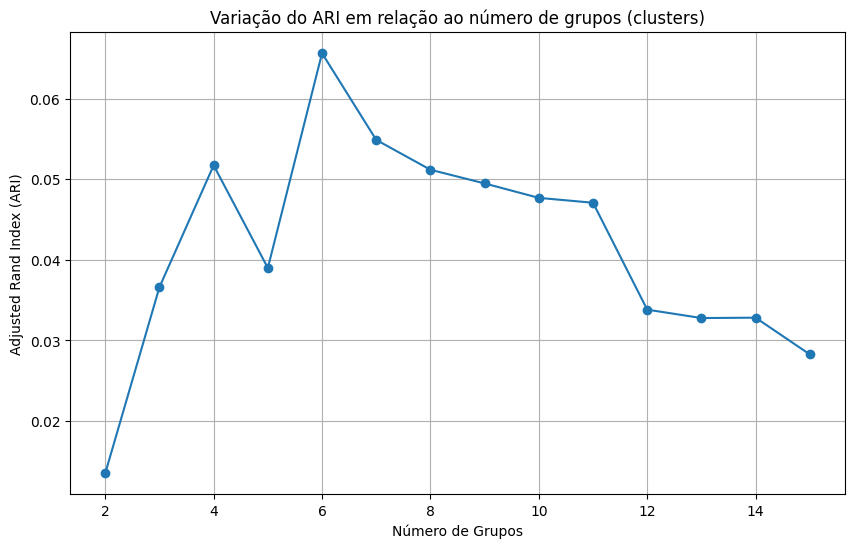

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definir um intervalo de valores para o número de grupos
intervalo_num_grupos = range(2, 16)  # De 2 a 15, conforme exemplo

# Calcular o ARI para cada número de grupos no intervalo
ari_scores = []
for num_grupos in intervalo_num_grupos:
    kmeans = KMeans(n_clusters=num_grupos, random_state=42)
    kmeans.fit(df_sem_classe_normalized)
    df['Cluster'] = kmeans.labels_
    ari_score = adjusted_rand_score(df['Target'], df['Cluster'])
    ari_scores.append(ari_score)

# Criar um gráfico para visualizar a variação do ARI
plt.figure(figsize=(10, 6))
plt.plot(intervalo_num_grupos, ari_scores, marker='o')
plt.title('Variação do ARI em relação ao número de grupos (clusters)')
plt.xlabel('Número de Grupos')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.grid(True)
plt.show()


In [16]:
from sklearn.cluster import KMeans

# Inicializar uma lista para armazenar os modelos K-means
modelos_kmeans = []

# Definir um intervalo de valores para o número de grupos
intervalo_num_grupos = range(2, 16)  # De 2 a 15, conforme exemplo

# Aplicar o algoritmo K-means para cada número de grupos no intervalo
for num_grupos in intervalo_num_grupos:
    kmeans = KMeans(n_clusters=num_grupos, random_state=42)
    kmeans.fit(df_sem_classe_normalized)
    modelos_kmeans.append(kmeans)

# Exibir a quantidade de clusters atribuídos a cada ponto para o último modelo
labels_ultimo_modelo = modelos_kmeans[-1].labels_
print("Clusters atribuídos para o último modelo K-means:")
print(labels_ultimo_modelo)


Clusters atribuídos para o último modelo K-means:
[ 3  3  7 ... 13  1  8]


In [17]:
# Inicializar uma lista para armazenar os valores de inertia para cada modelo K-means
inertia_valores = []

# Coletar os valores de inertia para cada modelo K-means
for modelo_kmeans in modelos_kmeans:
    inertia_valores.append(modelo_kmeans.inertia_)

# Exibir os valores de inertia para cada número de grupos
for num_grupos, inertia_valor in zip(intervalo_num_grupos, inertia_valores):
    print(f"Número de Grupos: {num_grupos}, Inertia: {inertia_valor}")


Número de Grupos: 2, Inertia: 8191.771759198691
Número de Grupos: 3, Inertia: 7541.227082919497
Número de Grupos: 4, Inertia: 7077.478942841429
Número de Grupos: 5, Inertia: 6687.363700703263
Número de Grupos: 6, Inertia: 6387.633777238358
Número de Grupos: 7, Inertia: 6134.014633845791
Número de Grupos: 8, Inertia: 5980.2822455497735
Número de Grupos: 9, Inertia: 5904.457748091037
Número de Grupos: 10, Inertia: 5699.443545054706
Número de Grupos: 11, Inertia: 5650.945700944023
Número de Grupos: 12, Inertia: 5561.515137802464
Número de Grupos: 13, Inertia: 5467.02968707234
Número de Grupos: 14, Inertia: 5360.6495730250945
Número de Grupos: 15, Inertia: 5339.012790591063


In [18]:
from sklearn.metrics import silhouette_score

# Inicializar uma lista para armazenar os valores de silhueta para cada modelo K-means
silhueta_valores = []

# Coletar os valores de silhueta para cada modelo K-means
for modelo_kmeans in modelos_kmeans:
    silhueta_valor = silhouette_score(df_sem_classe_normalized, modelo_kmeans.labels_)
    silhueta_valores.append(silhueta_valor)

# Exibir os valores de silhueta para cada número de grupos
for num_grupos, silhueta_valor in zip(intervalo_num_grupos, silhueta_valores):
    print(f"Número de Grupos: {num_grupos}, Índice de Silhueta: {silhueta_valor}")


Número de Grupos: 2, Índice de Silhueta: 0.14063399893251888
Número de Grupos: 3, Índice de Silhueta: 0.1266103744712279
Número de Grupos: 4, Índice de Silhueta: 0.11748628013498319
Número de Grupos: 5, Índice de Silhueta: 0.13082808597681603
Número de Grupos: 6, Índice de Silhueta: 0.13221207553852868
Número de Grupos: 7, Índice de Silhueta: 0.1296439883752445
Número de Grupos: 8, Índice de Silhueta: 0.10347555479277053
Número de Grupos: 9, Índice de Silhueta: 0.09824288824499319
Número de Grupos: 10, Índice de Silhueta: 0.11008821617207064
Número de Grupos: 11, Índice de Silhueta: 0.09659173429319341
Número de Grupos: 12, Índice de Silhueta: 0.09551398314917087
Número de Grupos: 13, Índice de Silhueta: 0.09271831576514249
Número de Grupos: 14, Índice de Silhueta: 0.09651898776453449
Número de Grupos: 15, Índice de Silhueta: 0.09432772034502976


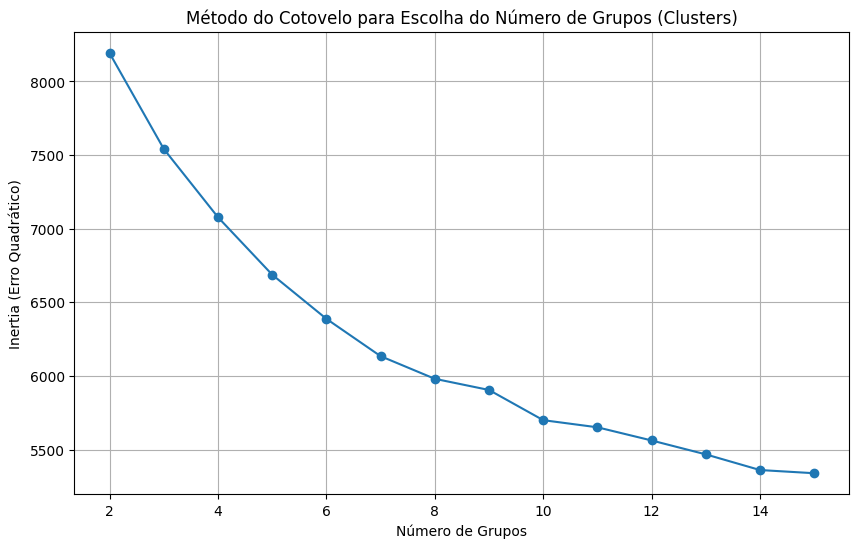

In [19]:
# Plotar o gráfico dos valores de inertia em relação ao número de grupos
plt.figure(figsize=(10, 6))
plt.plot(intervalo_num_grupos, inertia_valores, marker='o')
plt.title('Método do Cotovelo para Escolha do Número de Grupos (Clusters)')
plt.xlabel('Número de Grupos')
plt.ylabel('Inertia (Erro Quadrático)')
plt.grid(True)
plt.show()


Difícil nesse gráfico tirarmos o numero ideal de grupos pelo método do cotovelo. Entretanto, consideraremos o numero como 8.

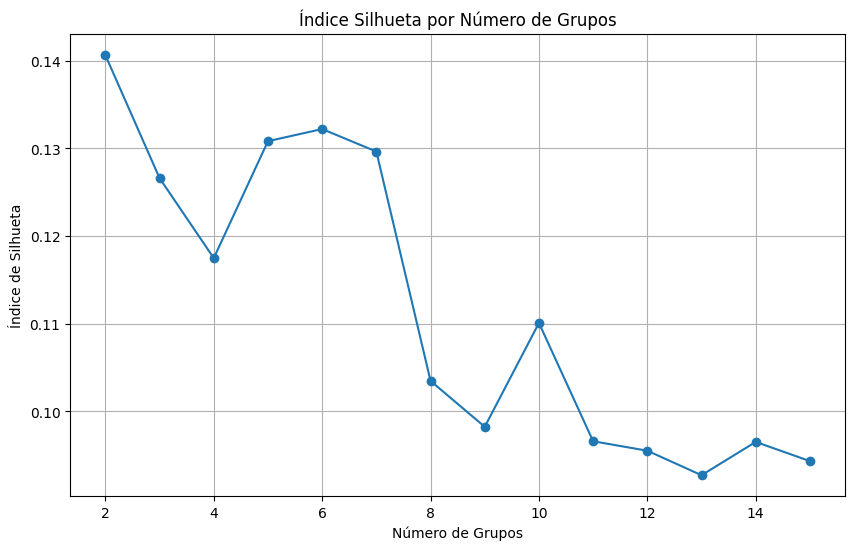

In [20]:
# Plotar o gráfico dos valores de silhueta em relação ao número de grupos
plt.figure(figsize=(10, 6))
plt.plot(intervalo_num_grupos, silhueta_valores, marker='o')
plt.title('Índice Silhueta por Número de Grupos')
plt.xlabel('Número de Grupos')
plt.ylabel('Índice de Silhueta')
plt.grid(True)
plt.show()
